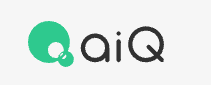

[disclaimer](./disclaimer.txt/)

# Load FACTSET Consensus Estimate data.
This sample show how to achieve the following operation with a simple interface

## `DAL`  Data Accessor Library 
> DAL access data from FACTSET database

In [1]:
from aiq_strategy_robot.data.data_accessor import DAL
from aiq_strategy_robot.data.FACTSET.load_factset_fundamental_estimates import load_factset_fundamental_estimates

In [2]:
handler = DAL()
data_source='FACTSET'

### Pattern 1: look up FACTSET from symbols, package and freq.

#### Find out factset symbols from tickers

In [3]:
handler.load(
    data_source,
    data_type="symbol_lookup",
    ticker=["GOOG-US", 'MSFT-US'],
    exchange_code="NAS",
    pick_only_primary=True
).retrieve().head()

,FSYM_ID,FSYM_SECURITY_ID,FACTSET_ENTITY_ID,TICKER,COMPANY_NAME,EXCHANGE_CODE,CURRENCY,FIGI,BBG_TICKER
0,WFJYTJ-R,DC1QVX-S,0FPWZZ-E,GOOG-US,Alphabet Inc. Class C,NAS,USD,BBG009S3NB30,GOOG US
2,P8R3C2-R,DF3K29-S,000Q07-E,MSFT-US,Microsoft Corporation,NAS,USD,BBG000BPH459,MSFT US


### `load_factset_fundamental_estimates`  
loading FACTSET consensus estimates 

In [4]:
handler = load_factset_fundamental_estimates(handler,                        
                                    symbols=["WFJYTJ-R","P8R3C2-R"],
                                    package="BASIC",
                                    freq=3)

handler.retrieve().head()

,symbol,FE_ITEM,CURRENCY,FE_PER_REL,FE_MEAN,FE_MEDIAN,FE_NUM_EST,FE_LOW,FE_HIGH,FE_STD_DEV,FE_UP,FE_DOWN,consensus_start_date,consensus_end_date,adjustment_date,fiscal_period_end_date
0,P8R3C2-R,SALES,USD,5,59803.588713,59557.500000,26,57000.000000,63270.000000,1423.040064,0,3,2023-01-24,2023-01-24,2004-11-15,2023-12-31
1,WFJYTJ-R,EPS,USD,3,0.642212,0.657845,18,0.394500,0.749500,0.080360,7,7,2020-08-24,2020-09-06,2022-07-18,2021-03-31
2,P8R3C2-R,EPS,USD,10,1.989419,2.020000,3,1.740000,2.208258,0.235622,1,2,2020-11-14,2020-11-24,2004-11-15,2023-03-31
3,WFJYTJ-R,SALES,USD,7,106207.554535,106376.000000,12,102747.952718,109311.802000,1966.911653,5,1,2024-04-30,NaT,2022-07-18,2025-12-31
4,P8R3C2-R,EPS,USD,2,1.769979,1.770000,29,1.680000,1.950000,0.069061,23,2,2021-02-07,2021-02-07,2004-11-15,2021-06-30


### Data Access handler load
Load the data to memory

same return as **load_factset_fundamental_estimates**
```
sdh = load_factset_fundamental_estimates(handler,                        
                                    symbols="WFJYTJ-R",
                                    package="BASIC",
                                    freq=3)

```

In [5]:
handler.load(
    data_source,
    data_type="fundamental_estimates",
    symbols="WFJYTJ-R",
    package="BASIC",
    freq=3
).retrieve().head()

,symbol,FE_ITEM,CURRENCY,FE_PER_REL,FE_MEAN,FE_MEDIAN,FE_NUM_EST,FE_LOW,FE_HIGH,FE_STD_DEV,FE_UP,FE_DOWN,consensus_start_date,consensus_end_date,adjustment_date,fiscal_period_end_date
0,WFJYTJ-R,EPS,USD,3,1.163756,1.136500,35,0.902000,1.531000,0.129090,3,0,2021-07-13,2021-07-13,2022-07-18,2021-12-31
1,WFJYTJ-R,CFPS,USD,0,0.066548,0.066548,1,0.066548,0.066548,NaN,0,0,2006-04-20,2006-05-22,2022-07-18,2006-03-31
2,WFJYTJ-R,CFPS,USD,0,0.073305,0.073305,2,0.070787,0.075824,0.003562,1,0,2007-01-31,2007-01-31,2022-07-18,2006-09-30
3,WFJYTJ-R,CFPS,USD,3,0.078553,0.078553,2,0.077279,0.079827,0.001802,0,0,2006-05-23,2006-07-09,2022-07-18,2006-12-31
4,WFJYTJ-R,CFPS,USD,2,0.077100,0.077100,2,0.075873,0.078326,0.001735,0,0,2006-10-03,2006-10-18,2022-07-18,2006-12-31


#### Narrow down output by specifying optional parameters
- `fields`: shrink by fundamental item names
- `start_datetime` and `end_datetime`: shrink by fundamental data releases

#### Specifying releases

In [6]:
# Get 'sales' and 'EPS' items only.
load_factset_fundamental_estimates(handler,  
    symbols="WFJYTJ-R",
    fields=["SALES", "EPS"],
    package="BASIC",
    freq=3
).retrieve().head()

,symbol,FE_ITEM,CURRENCY,FE_PER_REL,FE_MEAN,FE_MEDIAN,FE_NUM_EST,FE_LOW,FE_HIGH,FE_STD_DEV,FE_UP,FE_DOWN,consensus_start_date,consensus_end_date,adjustment_date,fiscal_period_end_date
0,WFJYTJ-R,EPS,USD,3,0.268422,0.269011,35,0.245488,0.292784,0.009507,5,14,2012-02-04,2012-02-09,2022-07-18,2012-09-30
1,WFJYTJ-R,EPS,USD,3,0.270607,0.269512,36,0.245488,0.329319,0.014209,5,16,2012-03-02,2012-03-07,2022-07-18,2012-09-30
2,WFJYTJ-R,EPS,USD,1,0.523990,0.521500,35,0.466000,0.590000,0.030103,11,13,2019-02-05,2019-02-05,2022-07-18,2019-03-31
3,WFJYTJ-R,EPS,USD,6,0.871752,0.880191,12,0.671140,1.101500,0.121322,4,2,2021-02-23,2021-03-24,2022-07-18,2022-06-30
4,WFJYTJ-R,SALES,USD,1,55659.267824,56472.000000,34,49020.000000,57853.000000,1868.842936,27,1,2021-05-07,2021-05-10,2022-07-18,2021-06-30


#### Specifying release timings

In [7]:
# Get records for 2021 and 2022. See `fiscal_period_end_date` column.
load_factset_fundamental_estimates(handler, 
    symbols="WFJYTJ-R",
    package="BASIC",
    freq=3,
    start_datetime='2021-01-01',
    end_datetime='2022-12-31'
).retrieve().head()

,symbol,FE_ITEM,CURRENCY,FE_PER_REL,FE_MEAN,FE_MEDIAN,FE_NUM_EST,FE_LOW,FE_HIGH,FE_STD_DEV,FE_UP,FE_DOWN,consensus_start_date,consensus_end_date,adjustment_date,fiscal_period_end_date
0,WFJYTJ-R,EPS,USD,1,1.280062,1.2600,39,1.170000,1.6500,0.091690,4,32,2022-09-30,2022-10-03,2022-07-18,2022-09-30
1,WFJYTJ-R,SALES,USD,12,66285.257355,67831.0000,3,56889.772064,74135.0000,8725.907511,0,0,2020-02-04,2020-03-26,2022-07-18,2022-12-31
2,WFJYTJ-R,SALES,USD,10,56867.219600,58515.0000,3,47778.658800,64308.0000,8386.964010,0,0,2020-02-04,2020-03-26,2022-07-18,2022-06-30
3,WFJYTJ-R,SALES,USD,1,71249.726817,71009.0000,33,66467.000000,83982.0000,2575.001289,0,5,2022-10-15,2022-10-16,2022-07-18,2022-09-30
4,WFJYTJ-R,EPS,USD,4,0.631388,0.6245,17,0.299500,0.8355,0.129872,11,2,2020-06-18,2020-06-23,2022-07-18,2021-03-31
